# News Based Sentiment Analysis using Deep Reinforcement Learning

In [1]:
#Import librraries required.
import pandas as pd
import numpy as np

/tmp/ipykernel_192276/3866842725.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Get the news data from dataset folder
business_standard_news_data = pd.read_csv(r'./datasets/business_standard_from_30th_july.csv')
reliance_stock_data = pd.read_csv(r'./datasets/Reliance_data.csv')

In [3]:
#check the datasets
business_standard_news_data.head(10)

,Date,News Source,Title,Description,URL of Article,Duplicate
0,1/23/2021,Business Standard,Reliance Industries Q3 Consolidated Pat At Rs ...,Topline takes a hit by 21% as Covid-19 impacts...,/article/companies/reliance-indreliance-indust...,0
1,1/22/2021,Business Standard,Reliance Retail Q3 Revenue Declines 9.7% To Rs...,"Yearly numbers are not comparable, RIL said, s...",/article/companies/reliance-retail-q3-revenue-...,0
2,1/22/2021,Press Trust of India,"Reliance Jio Net Profit Rises 15.5% To Rs 3,48...","Jio Platforms, which provides digital and tele...",/article/companies/reliance-jio-net-profit-ris...,0
3,1/22/2021,Business Standard,Reliance Retail Pre-Tax Profit Rises 11.8% At ...,The retail arm of Reliance Industries had post...,/article/companies/reliance-retail-pre-tax-pro...,0
4,1/22/2021,Business Standard,"Sensex Ends At Day'S Low, Down 746 Pts ; Bajaj...",Shares of Reliance Industries ended 2.4 per ce...,/article/markets/market-live-markets-sgx-nifty...,0
5,1/22/2021,Business Standard,"Sbi, Itc, Titan: Over 50% Of Sensex Constituen...","Technical indicators show that Bharti Airtel, ...",/article/markets/sbi-itc-titan-over-50-of-sens...,0
6,1/22/2021,Business Standard,"Stocks To Watch: Ril, Yes Bank, Vedanta, Hdfc ...",SBI Cards and Payment Services reported nearly...,/article/markets/stocks-to-watch-ril-yes-bank-...,0
7,1/21/2021,Business Standard,"Road To 50K: Sensex Jumps 10,000 Pts In 74 Ses...","During the 74 sessions, the market capitalisat...",/article/markets/road-to-50k-sensex-jumps-10-0...,0
8,1/21/2021,Business Standard,Ril Hits Over 2-Month High On Sebi Nod To Futu...,Sebi gave a go-ahead to Future Group's scheme ...,/article/markets/reliance-industries-gains-for...,0
9,1/21/2021,Business Standard,"Stocks To Watch: Ril, Axis Bank, Bajaj Auto, B...",Competition Commission of India approved the a...,/article/markets/stocks-to-watch-ril-axis-bank...,0


In [4]:
reliance_stock_data.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,RELIANCE,EQ,01-Jan-2020,1514.05,1518.00,1527.10,1505.50,1511.80,1509.60,1515.23,6402372,9.701063e+09,122265
1,RELIANCE,EQ,02-Jan-2020,1509.60,1512.00,1540.95,1512.00,1534.10,1535.30,1530.86,8096561,1.239471e+10,151727
2,RELIANCE,EQ,03-Jan-2020,1535.30,1533.00,1541.65,1523.00,1536.00,1537.15,1532.73,9593498,1.470428e+10,149003
3,RELIANCE,EQ,06-Jan-2020,1537.15,1520.00,1527.90,1498.00,1499.90,1501.50,1512.57,11209343,1.695494e+10,225138
4,RELIANCE,EQ,07-Jan-2020,1501.50,1519.00,1534.50,1513.50,1526.95,1524.60,1523.12,7627191,1.161710e+10,180713
5,RELIANCE,EQ,08-Jan-2020,1524.60,1515.00,1534.45,1510.00,1514.00,1513.15,1518.24,7336561,1.113864e+10,169662
6,RELIANCE,EQ,09-Jan-2020,1513.15,1538.60,1550.00,1531.25,1549.50,1548.00,1541.76,6849606,1.056043e+10,154953
7,RELIANCE,EQ,10-Jan-2020,1548.00,1551.90,1557.95,1539.65,1546.85,1547.65,1549.42,5704686,8.838954e+09,136340
8,RELIANCE,EQ,13-Jan-2020,1547.65,1545.05,1558.70,1538.40,1539.85,1543.70,1548.94,8358090,1.294615e+10,143022
9,RELIANCE,EQ,14-Jan-2020,1543.70,1540.00,1550.00,1521.85,1529.10,1529.40,1533.76,7230788,1.109026e+10,173502


In [5]:
#select necessary columns from both the datasets
#first: select few columns from stock reliance data
reliance_stock_data_1 = reliance_stock_data[['Date','Open Price','High Price','Low Price','Close Price','Total Traded Quantity']]

#rename columns of the dataset
reliance_stock_data_1 = reliance_stock_data_1.rename(columns = {'Date':'Date','Open Price':'open','High Price':'high','Low Price':'low','Close Price':'close', 'Total Traded Quantity':'volume'})

#second: select few columns from business standard dataset
business_standard_news_data_1 = business_standard_news_data[['Date','News Source','Title','Description']]

In [6]:
#formatting the date column of news dataset and reliance dataset
import datetime
# import parser
import dateutil
business_standard_news_data_1['Date'] = business_standard_news_data_1['Date'].apply(dateutil.parser.parse)
#changing all the date formats to be same in both the dataset.
reliance_stock_data_1['Date'] = pd.to_datetime(reliance_stock_data_1['Date'], errors='coerce')
reliance_stock_data_1['Date'] = pd.to_datetime(reliance_stock_data_1['Date'].dt.strftime('%m/%d/%Y'))
business_standard_news_data_1['Date'] = pd.to_datetime(business_standard_news_data_1['Date'].dt.strftime('%m/%d/%Y'))

reliance_stock_data_1.head()

/tmp/ipykernel_192276/2262206167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_standard_news_data_1['Date'] = business_standard_news_data_1['Date'].apply(dateutil.parser.parse)
/tmp/ipykernel_192276/2262206167.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_standard_news_data_1['Date'] = pd.to_datetime(business_standard_news_data_1['Date'].dt.strftime('%m/%d/%Y'))


,Date,open,high,low,close,volume
0,2020-01-01,1518.0,1527.10,1505.5,1509.60,6402372
1,2020-01-02,1512.0,1540.95,1512.0,1535.30,8096561
2,2020-01-03,1533.0,1541.65,1523.0,1537.15,9593498
3,2020-01-06,1520.0,1527.90,1498.0,1501.50,11209343
4,2020-01-07,1519.0,1534.50,1513.5,1524.60,7627191


In [7]:
#saving the reliance stock data to csv
reliance_stock_data_1.to_csv('./datasets/reliance_stock_corrected.csv')

### Exploratory Data Analysis on the Reliance Stock Data

In [8]:
#using the package mplfinance to plot both price and volume
import mplfinance as mpf

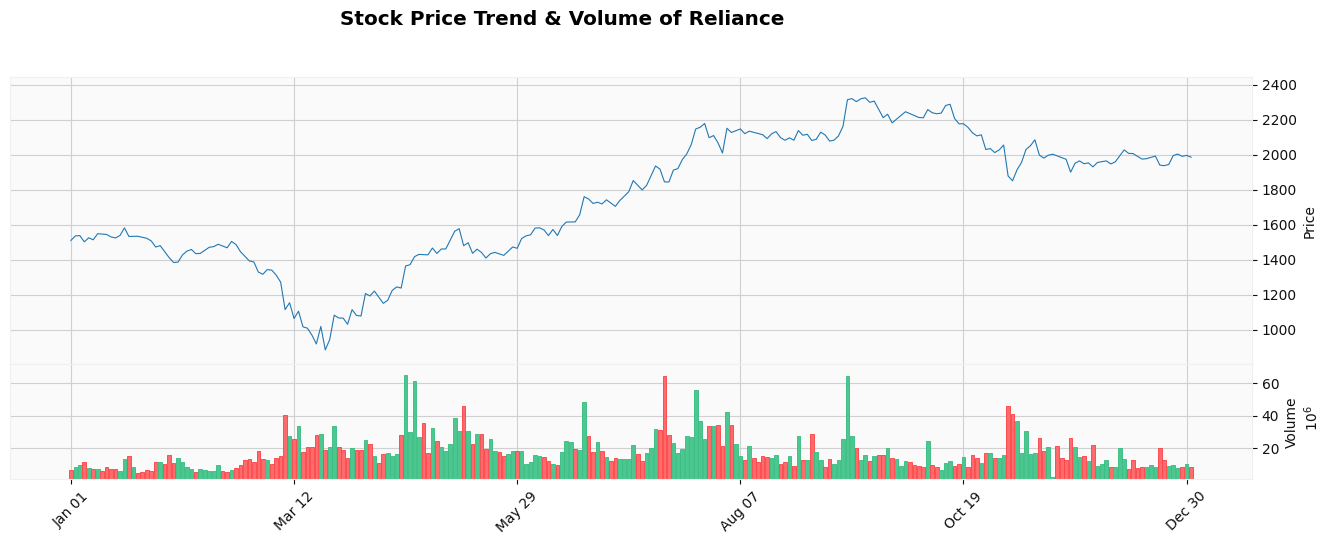

In [9]:
#Plotting trend data of price and Volume.
reliance_stock_data_1 = reliance_stock_data_1.set_index('Date')
mpf.plot(reliance_stock_data_1,type= 'line',volume = True,figratio=(30,10),title = 'Stock Price Trend & Volume of Reliance',ylabel = 'Price',ylabel_lower ='Volume',style='yahoo')

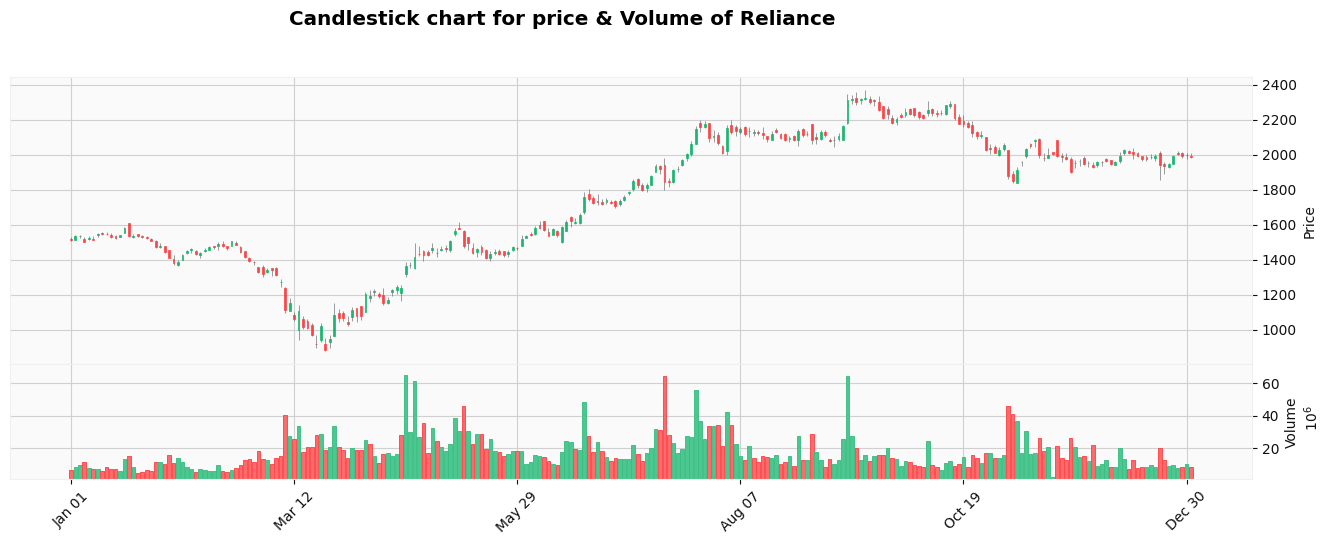

In [10]:
#plotting candelstick patterns
mpf.plot(reliance_stock_data_1,type= 'candle',style = 'yahoo',volume = True,figratio=(30,10),title = 'Candlestick chart for price & Volume of Reliance',ylabel = 'Price',ylabel_lower ='Volume')

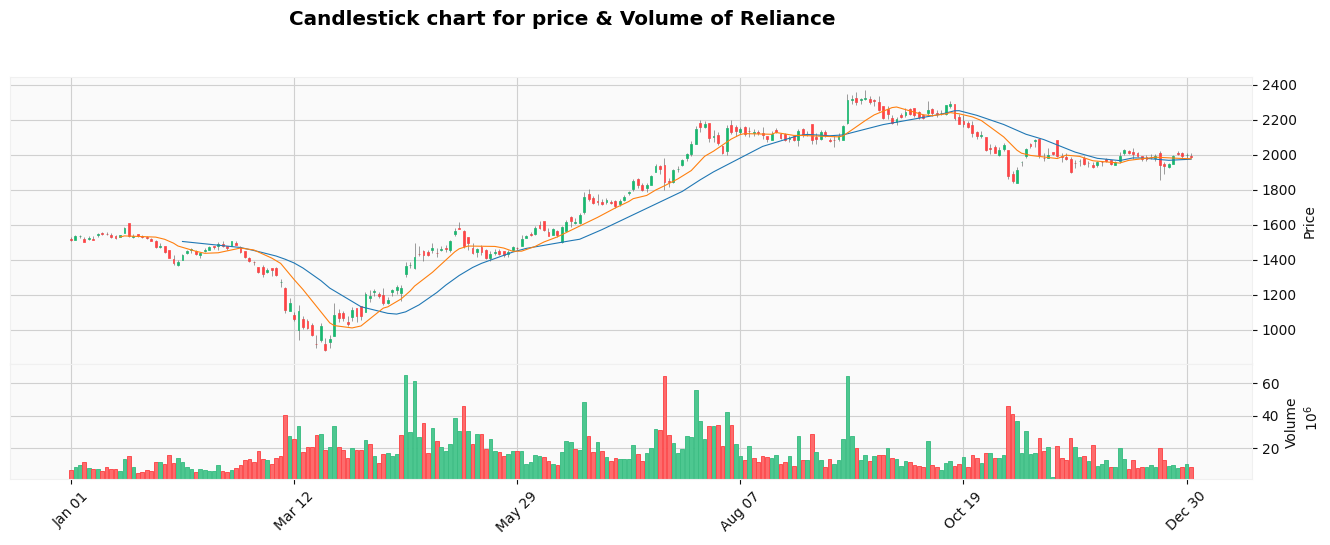

In [11]:
#plotting candelstick patterns with moving averages
mpf.plot(reliance_stock_data_1,type= 'candle',style = 'yahoo',volume = True,figratio=(30,10),title = 'Candlestick chart for price & Volume of Reliance',ylabel = 'Price',ylabel_lower ='Volume',mav=(26,12))

Calculating Technical Indicators to the dataframe.

In [12]:
#generating technical indicators
#importing libraries
import stockstats
from stockstats import StockDataFrame as Sdf

In [13]:
stockstats_df = Sdf.retype(reliance_stock_data_1)

In [14]:
reliance_stock_data_1['rsi'] = stockstats_df['rsi_14']
reliance_stock_data_1['macd'] = stockstats_df['macd']
reliance_stock_data_1['volume_delta'] = stockstats_df['volume_delta']
reliance_stock_data_1['adx'] = stockstats_df['adx']
reliance_stock_data_1['cci_30'] = stockstats_df['cci_30']
reliance_stock_data_1['atr'] = stockstats_df['atr']
reliance_stock_data_1['volatility_ratio'] = stockstats_df['vr']

### Sentiment Analysis on the business standard news dataset.

In [15]:
#loading the required libraries 
from finBERT.finbert.finbert import *

/home/anish/anaconda3/envs/stock_finrl/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
#creating copy of the data from business standard for sentiment score and prediction
sentiment_on_news_df = business_standard_news_data_1.copy()
sentiment_on_news_df.head()

,Date,News Source,Title,Description
0,2021-01-23,Business Standard,Reliance Industries Q3 Consolidated Pat At Rs ...,Topline takes a hit by 21% as Covid-19 impacts...
1,2021-01-22,Business Standard,Reliance Retail Q3 Revenue Declines 9.7% To Rs...,"Yearly numbers are not comparable, RIL said, s..."
2,2021-01-22,Press Trust of India,"Reliance Jio Net Profit Rises 15.5% To Rs 3,48...","Jio Platforms, which provides digital and tele..."
3,2021-01-22,Business Standard,Reliance Retail Pre-Tax Profit Rises 11.8% At ...,The retail arm of Reliance Industries had post...
4,2021-01-22,Business Standard,"Sensex Ends At Day'S Low, Down 746 Pts ; Bajaj...",Shares of Reliance Industries ended 2.4 per ce...


In [17]:
from transformers import AutoModelForSequenceClassification
#using the finbert predict method generate sentiment score based on Title and Description
#Get the model information to finbert
#load the model
model = AutoModelForSequenceClassification.from_pretrained(r'./models',num_labels=3,cache_dir=None)

#Generate new df with sentiment information
sentiment_prediction_generated_on_title = []
sentiment_score_generated_on_title=[]
sentiment_prediction_generated_on_desc = []
sentiment_score_generated_on_desc = []
for i in range(0,len(sentiment_on_news_df)):
    x1 = predict(sentiment_on_news_df.Title[i],model,write_to_csv = False,path=None)
    sentiment_prediction_generated_on_title.append(x1.prediction[0])
    sentiment_score_generated_on_title.append(x1.sentiment_score[0])
    x2 = predict(sentiment_on_news_df.Description[i],model,write_to_csv = False,path=None)
    sentiment_prediction_generated_on_desc.append(x2.prediction[0])
    sentiment_score_generated_on_desc.append(x2.sentiment_score[0])

#appending the results in the columns of the main dataframe
sentiment_on_news_df["SP_Title"] = sentiment_prediction_generated_on_title
sentiment_on_news_df['SC_Score'] = sentiment_score_generated_on_title
sentiment_on_news_df['SP_Desc'] = sentiment_prediction_generated_on_desc
sentiment_on_news_df['SC_Desc'] = sentiment_score_generated_on_desc    

02/03/2024 22:46:26 - INFO - root -   Using device: cpu 
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   *** Example ***
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   guid: 0
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   tokens: [CLS] reliance industries q ##3 consolidated pat at rs 13 , 101 cr , up 12 . 5 % yo ##y [SEP]
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   input_ids: 101 17975 6088 1053 2509 10495 6986 2012 12667 2410 1010 7886 13675 1010 2039 2260 1012 1019 1003 10930 2100 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   attention_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
02/03/2024 22:46:26 - INFO - finBERT.finbert.utils -   token_type_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [18]:
sentiment_on_news_df.head(10)

,Date,News Source,Title,Description,SP_Title,SC_Score,SP_Desc,SC_Desc
0,2021-01-23,Business Standard,Reliance Industries Q3 Consolidated Pat At Rs ...,Topline takes a hit by 21% as Covid-19 impacts...,positive,0.929117,negative,-0.855549
1,2021-01-22,Business Standard,Reliance Retail Q3 Revenue Declines 9.7% To Rs...,"Yearly numbers are not comparable, RIL said, s...",negative,-0.961476,negative,-0.909392
2,2021-01-22,Press Trust of India,"Reliance Jio Net Profit Rises 15.5% To Rs 3,48...","Jio Platforms, which provides digital and tele...",positive,0.902900,positive,0.576960
3,2021-01-22,Business Standard,Reliance Retail Pre-Tax Profit Rises 11.8% At ...,The retail arm of Reliance Industries had post...,positive,0.893124,neutral,0.104831
4,2021-01-22,Business Standard,"Sensex Ends At Day'S Low, Down 746 Pts ; Bajaj...",Shares of Reliance Industries ended 2.4 per ce...,negative,-0.953013,negative,-0.964707
5,2021-01-22,Business Standard,"Sbi, Itc, Titan: Over 50% Of Sensex Constituen...","Technical indicators show that Bharti Airtel, ...",negative,-0.945267,negative,-0.581487
6,2021-01-22,Business Standard,"Stocks To Watch: Ril, Yes Bank, Vedanta, Hdfc ...",SBI Cards and Payment Services reported nearly...,neutral,0.039644,negative,-0.963024
7,2021-01-21,Business Standard,"Road To 50K: Sensex Jumps 10,000 Pts In 74 Ses...","During the 74 sessions, the market capitalisat...",positive,0.812817,positive,0.923352
8,2021-01-21,Business Standard,Ril Hits Over 2-Month High On Sebi Nod To Futu...,Sebi gave a go-ahead to Future Group's scheme ...,positive,0.885631,neutral,0.096040
9,2021-01-21,Business Standard,"Stocks To Watch: Ril, Axis Bank, Bajaj Auto, B...",Competition Commission of India approved the a...,neutral,0.013906,positive,0.541712


In [19]:
#save the data to csv file
sentiment_on_news_df.to_csv(r"./datasets/sentiment_Score_dataset.csv", sep=',', index=False)

In [20]:
#read if sentiment score run is not workking.
sentiment_on_news_df = pd.read_csv(r'./datasets/sentiment_Score_dataset.csv')
sentiment_on_news_df['Date'] = pd.to_datetime(sentiment_on_news_df['Date'], errors='coerce')
sentiment_on_news_df['Date'] = pd.to_datetime(sentiment_on_news_df['Date'].dt.strftime('%m/%d/%Y'))

In [21]:
sentiment_on_news_df.head()

,Date,News Source,Title,Description,SP_Title,SC_Score,SP_Desc,SC_Desc
0,2021-01-23,Business Standard,Reliance Industries Q3 Consolidated Pat At Rs ...,Topline takes a hit by 21% as Covid-19 impacts...,positive,0.929117,negative,-0.855549
1,2021-01-22,Business Standard,Reliance Retail Q3 Revenue Declines 9.7% To Rs...,"Yearly numbers are not comparable, RIL said, s...",negative,-0.961476,negative,-0.909392
2,2021-01-22,Press Trust of India,"Reliance Jio Net Profit Rises 15.5% To Rs 3,48...","Jio Platforms, which provides digital and tele...",positive,0.902900,positive,0.576960
3,2021-01-22,Business Standard,Reliance Retail Pre-Tax Profit Rises 11.8% At ...,The retail arm of Reliance Industries had post...,positive,0.893124,neutral,0.104831
4,2021-01-22,Business Standard,"Sensex Ends At Day'S Low, Down 746 Pts ; Bajaj...",Shares of Reliance Industries ended 2.4 per ce...,negative,-0.953013,negative,-0.964707


### Joining the datasets

In [22]:
# reliance_stock_data_1
sentiment_on_news_df = sentiment_on_news_df.reset_index()
sentiment_on_news_df = sentiment_on_news_df.rename(columns = {'Date':'date'})
sentiment_on_news_df = sentiment_on_news_df.set_index('date')
#creating frames 
combined_df = reliance_stock_data_1.join(sentiment_on_news_df)
combined_df_1 = combined_df.loc['2020-08-01':'2020-12-31']

In [23]:
# combined_df_1.to_csv("combined_information.csv")

since the combined dataset have multiple articles on the same day, first average out the sentiment scores from the headlines for each day and then combine to form a new dataframe.

In [24]:
sentiment_on_news_df_1 = sentiment_on_news_df.copy()
avg_sentim_df = pd.DataFrame(sentiment_on_news_df_1.groupby(['date'])['SC_Score'].mean())
avg_sentim_df = avg_sentim_df.reset_index()
# combining now the average sentiment with stock price data
combined_avg_sentiment_df = reliance_stock_data_1.join(avg_sentim_df.set_index('date'))

#filtering out the data for 4 months
combined_avg_sentiment_df_1 = combined_avg_sentiment_df.loc['2020-08-01':'2020-12-31']

In [25]:
combined_avg_sentiment_df_1.head()

,open,high,low,close,volume,rsi,macd,volume_delta,adx,cci_30,atr,volatility_ratio,SC_Score
Date,,,,,,,,,,,,,
2020-08-03,2051.3,2057.0,2003.10,2009.00,21560137,57.384044,97.539605,-13033238.0,37.589432,66.888328,67.735350,148.200154,NaN
2020-08-04,2020.6,2167.0,2000.25,2150.60,42477225,66.708840,99.260107,20917088.0,37.088892,102.747674,74.807947,171.669387,0.128978
2020-08-05,2169.0,2196.0,2118.30,2126.45,34405886,64.131470,97.550430,-8071339.0,37.710197,114.257931,75.014525,158.964748,-0.160349
2020-08-06,2157.0,2167.7,2107.80,2134.10,22762726,64.598075,95.709503,-11643160.0,37.342480,100.313267,73.934900,162.451230,NaN
2020-08-07,2129.8,2157.8,2120.20,2146.45,15222384,65.381035,94.161651,-7540342.0,37.079825,95.288722,71.339514,163.152300,NaN


In [26]:
#replace NaN with 0 as on that day no news was captured from the news source. In our study this indicates neutral sentiment.
combined_avg_sentiment_df_1['SC_Score'] = combined_avg_sentiment_df_1['SC_Score'].fillna(0)

#final dataset for reinforcement Learning agent
final_analysis_df = combined_avg_sentiment_df_1.copy()


/tmp/ipykernel_192276/822563104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_avg_sentiment_df_1['SC_Score'] = combined_avg_sentiment_df_1['SC_Score'].fillna(0)


### Training a Reinforcement Learning Agent

In [32]:
#import libraries - FinRL
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
import datetime
from finrl.config import DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent

import sys
sys.path.append("../finrl")



In [28]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
#creating directories for tensorboard logs and model directories.
import os
if not os.path.exists("./" + DATA_SAVE_DIR):
    os.makedirs("./" + DATA_SAVE_DIR)
if not os.path.exists("./" + TRAINED_MODEL_DIR):
    os.makedirs("./" + TRAINED_MODEL_DIR)
if not os.path.exists("./" + TENSORBOARD_LOG_DIR):
    os.makedirs("./" + TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + RESULTS_DIR):
    os.makedirs("./" + RESULTS_DIR)

In [34]:
#examine the shape of the data
print("Shape of the data is ",final_analysis_df.shape)
#spliting the data into train and trade dataframes
#train data from August 2020 to November 2020
#test data for December 2020
train = final_analysis_df.loc['2020-08-01':'2020-11-30']
#resent Index
train = train.reset_index()
train = train.sort_values(['Date'],ignore_index=True)
train.index = train.Date.factorize()[0]

#add a new column tic as "RELIANCE"
final_analysis_df["tic"] = "RELIANCE"
final_analysis_df = final_analysis_df.rename(columns = {"Date":'date'})
#shape of both splitted dataframes
print('Shape of the training dataset is : ',train.shape)
#print('Shape of the trading/test dataset is : ',trade.shape)

Shape of the data is  (106, 13)
Shape of the training dataset is :  (84, 14)


In [36]:
final_analysis_df.head()

,open,high,low,close,volume,rsi,macd,volume_delta,adx,cci_30,atr,volatility_ratio,SC_Score,tic
Date,,,,,,,,,,,,,,
2020-08-03,2051.3,2057.0,2003.10,2009.00,21560137,57.384044,97.539605,-13033238.0,37.589432,66.888328,67.735350,148.200154,0.000000,RELIANCE
2020-08-04,2020.6,2167.0,2000.25,2150.60,42477225,66.708840,99.260107,20917088.0,37.088892,102.747674,74.807947,171.669387,0.128978,RELIANCE
2020-08-05,2169.0,2196.0,2118.30,2126.45,34405886,64.131470,97.550430,-8071339.0,37.710197,114.257931,75.014525,158.964748,-0.160349,RELIANCE
2020-08-06,2157.0,2167.7,2107.80,2134.10,22762726,64.598075,95.709503,-11643160.0,37.342480,100.313267,73.934900,162.451230,0.000000,RELIANCE
2020-08-07,2129.8,2157.8,2120.20,2146.45,15222384,65.381035,94.161651,-7540342.0,37.079825,95.288722,71.339514,163.152300,0.000000,RELIANCE


In [38]:
#creating df with required columns
final_analysis_df_1 = final_analysis_df[["open","high","low","close","volume","rsi","macd","volume_delta","adx","cci_30","atr","volatility_ratio","SC_Score","tic"]]
#spliting the data into train and trade dataframes
#train data from August 2020 to November 2020
#test data for December 2020
train = final_analysis_df_1.loc['2020-08-01':'2020-11-30']
train = train.reset_index()
train.index = train.Date.factorize()[0]

In [54]:
train.rename(columns={'Date':'date'}, inplace=True)

In [55]:
train

,date,open,high,low,close,volume,rsi,macd,volume_delta,adx,cci_30,atr,volatility_ratio,SC_Score,tic
0,2020-08-03,2051.30,2057.00,2003.10,2009.00,21560137,57.384044,97.539605,-13033238.0,37.589432,66.888328,67.735350,148.200154,0.000000,RELIANCE
1,2020-08-04,2020.60,2167.00,2000.25,2150.60,42477225,66.708840,99.260107,20917088.0,37.088892,102.747674,74.807947,171.669387,0.128978,RELIANCE
2,2020-08-05,2169.00,2196.00,2118.30,2126.45,34405886,64.131470,97.550430,-8071339.0,37.710197,114.257931,75.014525,158.964748,-0.160349,RELIANCE
3,2020-08-06,2157.00,2167.70,2107.80,2134.10,22762726,64.598075,95.709503,-11643160.0,37.342480,100.313267,73.934900,162.451230,0.000000,RELIANCE
4,2020-08-07,2129.80,2157.80,2120.20,2146.45,15222384,65.381035,94.161651,-7540342.0,37.079825,95.288722,71.339514,163.152300,0.000000,RELIANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-11-23,1951.00,1970.00,1926.25,1950.70,20918665,41.927917,-43.191430,-5604307.0,11.481996,-80.674599,65.035703,85.090857,0.192588,RELIANCE
80,2020-11-24,1964.00,1974.00,1932.00,1964.05,14277083,43.569833,-41.174915,-6641582.0,12.427607,-71.825081,63.390296,85.046633,0.019341,RELIANCE
81,2020-11-25,1980.00,1992.95,1942.20,1947.80,15062376,42.012716,-40.422091,785293.0,11.569059,-65.772976,62.487417,83.078923,0.000000,RELIANCE
82,2020-11-26,1953.05,1965.00,1930.05,1952.60,11924527,42.664542,-38.988715,-3137849.0,11.765424,-74.363575,60.520459,92.452771,0.345292,RELIANCE


In [44]:
#designing the environment for the Training
#defining the environment variables
#initial amount to trade(Rs. 1,00,000)
initial_amount = 100000

#shares to trade. this defines how many shares per trade
shares_per_trade = 100

#total number of stocks in our portfolio
num_stock_portfolio = 1

#transaction fee / brokerage fee 
transaction_fee = 0.001

#reward_Scaling
reward_scale = 1e-4

technical_indicator_list = ["macd","rsi","adx","cci_30","volume_delta","volatility_ratio","atr","SC_Score"]

stock_dim = 1
state_space = 1 + 2*stock_dim + len(technical_indicator_list)*stock_dim

print(stock_dim)
print(state_space)

1
11


In [63]:
# adding the buy and sell fees
buy_cost = sell_cost = [0.001] * stock_dim
num_stocks = [0] * stock_dim


In [64]:
# #initializaing the environment class
# env_setup = StockTradingEnv(df=train,stock_dim = stock_dim,
#                       state_space = state_space,
#                       hmax = shares_per_trade,
#                       initial_amount = initial_amount,
#                       transaction_cost_pct = transaction_fee,
#                       tech_indicator_list = technical_indicator_list,
#                       action_space= stock_dim,
#                       reward_scaling=reward_scale)
# #env_train = env_setup.create_env_training(data = train,env_class = StockEnvTrain)
env_setup = StockTradingEnv(
    df=train,
    stock_dim=stock_dim,
    state_space=state_space,
    num_stock_shares=num_stocks,
    buy_cost_pct=buy_cost,
    sell_cost_pct=sell_cost,
    hmax=shares_per_trade,
    initial_amount=initial_amount,
    tech_indicator_list=technical_indicator_list,
    action_space=stock_dim,
    reward_scaling=reward_scale)


In [67]:
#getting the stable baseline environment
env_train, _ = env_setup.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [68]:
#implementing the DRL algorithms given in the FinRL library
agent = DRLAgent(env = env_train)

### Model 1 - A2C

In [69]:
agent = DRLAgent(env = env_train)
A2C_PARAMS = {"n_steps": 2, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 2, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [70]:
trained_a2c = agent.train_model(model=model_a2c,tb_log_name='a2c',total_timesteps=1000)

------------------------------------
| time/                 |          |
|    fps                | 295      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 200      |
| train/                |          |
|    entropy_loss       | -1.42    |
|    explained_variance | -9.5e+03 |
|    learning_rate      | 0.0002   |
|    n_updates          | 99       |
|    policy_loss        | -0.182   |
|    reward             | 0.0      |
|    std                | 1        |
|    value_loss         | 0.0335   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 301       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 400       |
| train/                |           |
|    entropy_loss       | -1.42     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 19

### Model 2 - TD3

In [71]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 128, 
              "buffer_size": 1000000, 
              "learning_rate": 0.0003}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0003}
Using cpu device


In [72]:
trained_td3 = agent.train_model(model=model_td3,tb_log_name='td3',total_timesteps=1000)

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 173       |
|    time_elapsed    | 1         |
|    total_timesteps | 336       |
| train/             |           |
|    actor_loss      | -5.95e+04 |
|    critic_loss     | 2.04e+10  |
|    learning_rate   | 0.0003    |
|    n_updates       | 168       |
|    reward          | 0.0       |
----------------------------------
day: 83, episode: 20
begin_total_asset: 100000.00
end_total_asset: 100000.00
total_reward: 0.00
total_cost: 0.00
total_trades: 0
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 110       |
|    time_elapsed    | 6         |
|    total_timesteps | 672       |
| train/             |           |
|    actor_loss      | -5.92e+04 |
|    critic_loss     | 6.04e+09  |
|    learning_rate   | 0.0003    |
|    n_updates       | 504       |
|    reward          | 0.0     

### Model 3 - DDPG

In [73]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 64, "buffer_size": 500000, "learning_rate": 0.0001}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 64, 'buffer_size': 500000, 'learning_rate': 0.0001}
Using cpu device


In [74]:
trained_ddpg = agent.train_model(model=model_ddpg,tb_log_name='ddpg',total_timesteps=1000)

day: 83, episode: 30
begin_total_asset: 100000.00
end_total_asset: 79475.90
total_reward: -20524.10
total_cost: 4317.55
total_trades: 59
Sharpe: -2.736
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 170        |
|    time_elapsed    | 1          |
|    total_timesteps | 336        |
| train/             |            |
|    actor_loss      | -344       |
|    critic_loss     | 2.68e+09   |
|    learning_rate   | 0.0001     |
|    n_updates       | 168        |
|    reward          | -0.0078104 |
-----------------------------------
-----------------------------------
| time/              |            |
|    episodes        | 8          |
|    fps             | 123        |
|    time_elapsed    | 5          |
|    total_timesteps | 672        |
| train/             |            |
|    actor_loss      | -1.58e+03  |
|    critic_loss     | 3.95e+07   |
|    learning_rate   | 0.0001     |
|    n_updates      

### Model 4 - PPO

In [75]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [76]:
trained_ppo = agent.train_model(model=model_ppo,tb_log_name='ppo',total_timesteps=1000)

day: 83, episode: 50
begin_total_asset: 100000.00
end_total_asset: 103235.05
total_reward: 3235.05
total_cost: 3989.40
total_trades: 68
Sharpe: 0.516
day: 83, episode: 60
begin_total_asset: 100000.00
end_total_asset: 106753.03
total_reward: 6753.03
total_cost: 3693.17
total_trades: 65
Sharpe: 1.226
-----------------------------
| time/              |      |
|    fps             | 818  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
| train/             |      |
|    reward          | 0.0  |
-----------------------------


### Model 5 - SAC

In [77]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.00003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 3e-05, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device


In [78]:
trained_sac = agent.train_model(model=model_sac,tb_log_name='sac',total_timesteps=1000)

---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 87       |
|    time_elapsed    | 3        |
|    total_timesteps | 336      |
| train/             |          |
|    actor_loss      | 5.18e+03 |
|    critic_loss     | 3.45e+07 |
|    ent_coef        | 0.101    |
|    ent_coef_loss   | 21.9     |
|    learning_rate   | 3e-05    |
|    n_updates       | 235      |
|    reward          | -0.11172 |
---------------------------------
day: 83, episode: 70
begin_total_asset: 100000.00
end_total_asset: 96020.76
total_reward: -3979.24
total_cost: 98.44
total_trades: 83
Sharpe: -0.215
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 68       |
|    time_elapsed    | 9        |
|    total_timesteps | 672      |
| train/             |          |
|    actor_loss      | 2.62e+03 |
|    critic_loss     | 1.86e+07 |
|    ent_coef        | 0.102    |
|

In [80]:
trade = final_analysis_df_1.loc['2020-12-01':'2020-12-31']

In [82]:
#add a new column tic as "RELIANCE"
#trade = trade.sort_values(['Date'],ignore_index=True)
trade = trade.reset_index()
#trade["tic"] = "RELIANCE"
trade = trade.rename(columns = {"Date":'date'})

In [83]:
trade.index = trade.date.factorize()[0]

In [91]:
## make a prediction and get the account value change
#trade = data_split(data_df, start = '2019-01-01', end = '2021-01-01')
e_trade_gym = StockTradingEnv(df = trade, stock_dim = stock_dim,
                      state_space = state_space,
                      hmax = shares_per_trade,
                      initial_amount = initial_amount,
                      buy_cost_pct=buy_cost,
                      sell_cost_pct=sell_cost,
                      num_stock_shares=num_stocks,
                    #   transaction_cost_pct = transaction_fee,
                      tech_indicator_list = technical_indicator_list,
                      action_space= stock_dim,
                      reward_scaling=reward_scale)
# env_trade, obs_trade = e_trade_gym.get_sb_env()


In [99]:
env_trade, obs_env = e_trade_gym.get_sb_env()
env_trade
obs_env

array([[ 1.0000000e+05,  1.9549000e+03,  0.0000000e+00, -3.6987747e+01,
         4.3957420e+01,  1.2073587e+01, -6.3273430e+01, -1.2730992e+07,
         8.9262581e+01,  5.7088558e+01,  0.0000000e+00]], dtype=float32)

In [96]:
trained_sac

In [104]:
#df_account_value, df_actions = DRLAgent.DRL_prediction(model=trained_sac,trade,test_env = env_trade,test_obs = obs_trade)
# df_account_value, df_actions =DRLAgent.DRL_prediction(trained_sac,trade,env_trade,obs_trade)
df_account_value, df_actions =DRLAgent.DRL_prediction(model=trained_sac,environment=e_trade_gym)


hit end!


In [105]:
df_actions.head()

,date,actions
0,2020-12-01,[51]
1,2020-12-02,[0]
2,2020-12-03,[0]
3,2020-12-04,[0]
4,2020-12-07,[0]


In [103]:
#backtesting the strategy
import datetime
import pyfolio
from finrl.trade.backtest import BackTestStats, BaselineStats, BackTestPlot
print("==============Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
perf_stats_all = BackTestStats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

ModuleNotFoundError: No module named 'finrl.trade.backtest'; 'finrl.trade' is not a package

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (21, 8)


Start date,2020-12-01
End date,2020-12-31
Total months,1
,Backtest
Annual return,17.937%
Cumulative returns,1.451%
Annual volatility,17.47%
Sharpe ratio,1.07
Calmar ratio,4.04
Stability,0.01
Max drawdown,-4.444%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.44,2020-12-09,2020-12-22,NaT,NaN
1,0.88,2020-12-03,2020-12-04,2020-12-08,4
2,NaN,NaT,NaT,NaT,NaN
3,NaN,NaT,NaT,NaT,NaN
4,NaN,NaT,NaT,NaT,NaN


ConversionError: Failed to convert value(s) to axis units: (NaT, Timestamp('2020-12-31 00:00:00+0000', tz='UTC'))

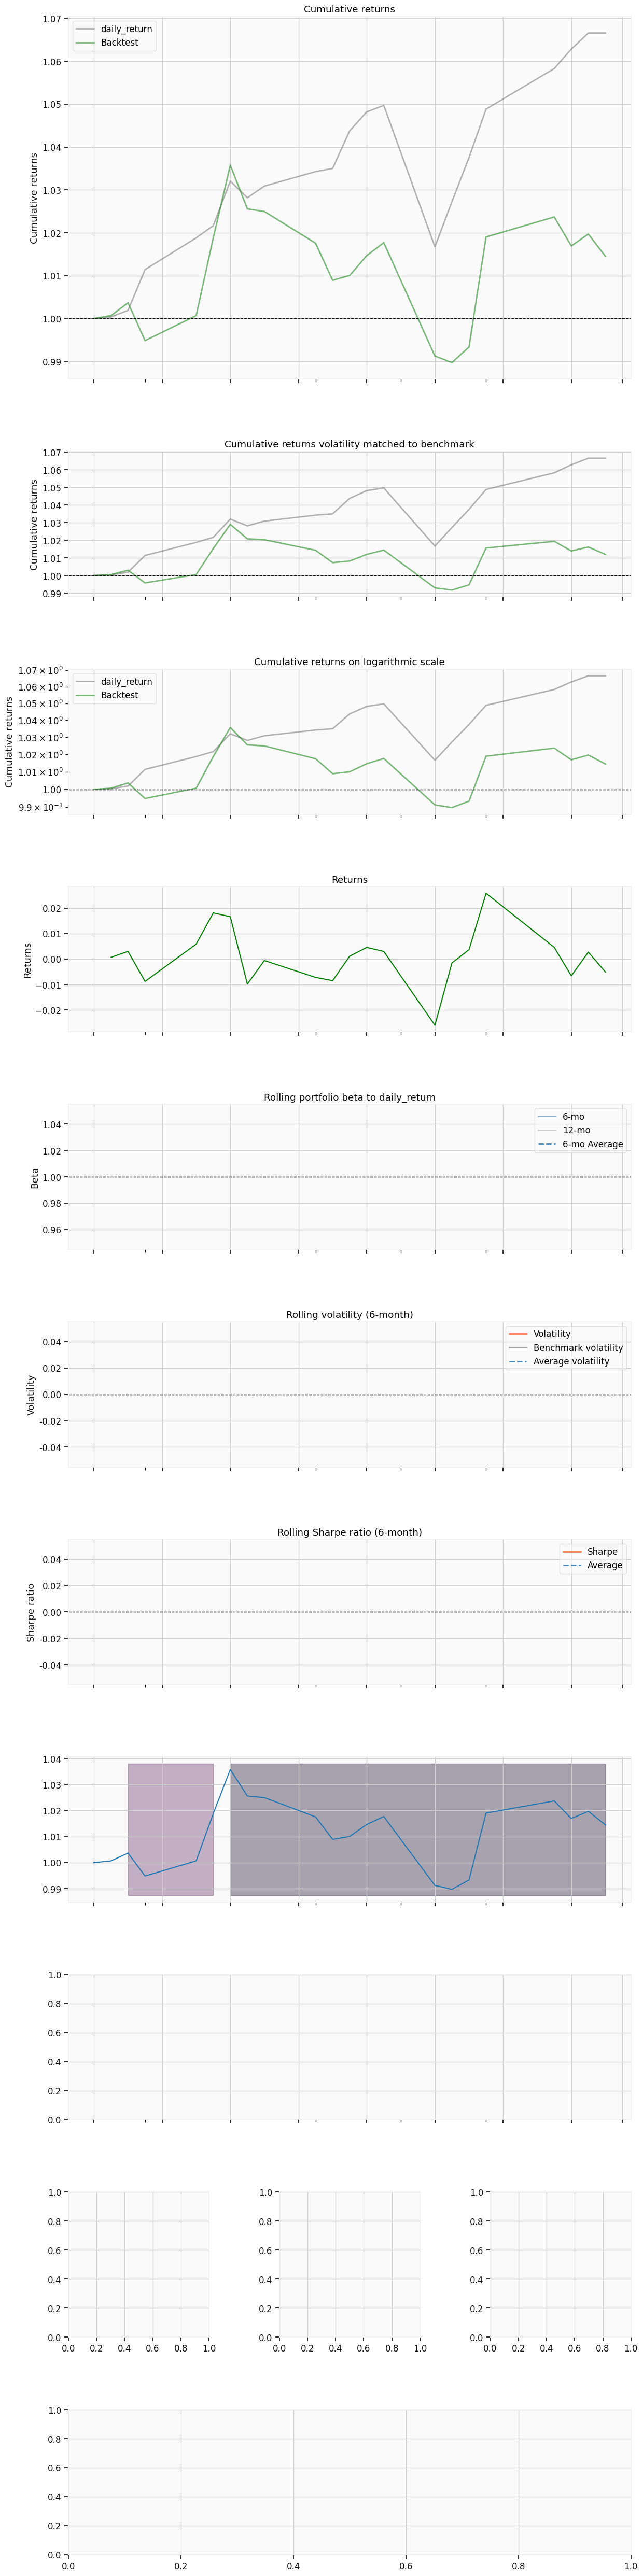

In [112]:
import datetime
from finrl import test
from finrl import plot
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
# perf_stats_all = test.

plot.backtest_plot(df_account_value, baseline_ticker='^NSEI', baseline_start='2020-12-01', baseline_end='2020-12-31')

In [108]:
# %matplotlib inline
# BackTestPlot(account_value=df_account_value, baseline_ticker = '^NSEI',baseline_start = '2020-12-01', baseline_end = '2020-12-31')

NameError: name 'BackTestPlot' is not defined